# MSiA 432 - Deep Learning - Final Project

## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain

## Prediction using pretrained model: DEX - Deep EXpectation

Reference: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [2]:
# Importing libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import mean_absolute_error

### Prediction of a single image

In [3]:
# Loading the model
age_model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_chalearn_iccv2015.caffemodel")

In [4]:
# Reading an image
img = cv2.imread("../../02_Data/face_age/003/207.png")

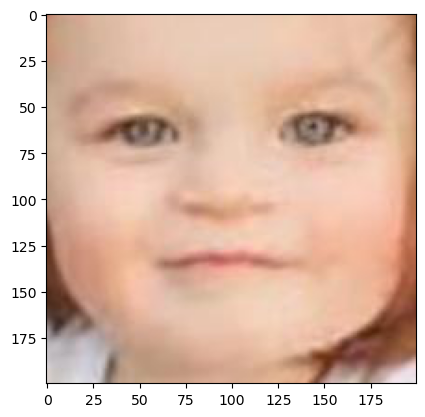

In [5]:
plt.imshow(img[:,:,::-1])

In [6]:
# Preprocessing the image to required format
img = cv2.dnn.blobFromImage(img)
img.shape

(1, 3, 200, 200)

In [7]:
# Predicting the age
age_model.setInput(img)
age_result = age_model.forward()

In [8]:
# Calculate age expected value
output_indexes = np.array([i for i in range(0, 101)])
apparent_predictions = round(np.sum(age_result * output_indexes), 2)
apparent_predictions

26.87

### Evaluate model on test set (used validation set because they were switched)

In [14]:
# Define the base path
base_path = "../../../team/course-teams/2023-msia431/team01/face_age_data/face_age_balanced_val/"

In [23]:
# Define a function for the prediction step
def get_prediction(img) -> list:
    """
    This function takes in an image and returns the predicted age.
    """
    # Preprocess the image
    img_blob = cv2.dnn.blobFromImage(img)
    
    # Set the input to the model
    age_model.setInput(img_blob)
    
    # Get the prediction from the model
    age_result = age_model.forward()

    return age_result

In [16]:
# Initialize two empty lists to hold the ground truth and predicted values
ground_truths = []
predictions = []

In [17]:
# Generate indexes to calculate expected age
output_indexes = np.array([i for i in range(0, 101)])

In [18]:
# Loop over folder names
for i in range(1, 91):
    # Format the folder name to have three digits, i.e., "001", "002", ..., "090"
    folder_name = str(i).zfill(3)
    
    # Create the full directory path
    dir_path = os.path.join(base_path, folder_name)
    
    # Get the list of files in the directory
    file_list = os.listdir(dir_path)
    
    # Loop over files in the directory
    for file_name in file_list:
        # Create the full file path
        file_path = os.path.join(dir_path, file_name)
        
        # Read the image
        img = cv2.imread(file_path)
        
        # Get the prediction from the model
        age_result = get_prediction(img)
        
        # Calculate expected age
        apparent_predictions = round(np.sum(age_result * output_indexes), 2)
        
        # Append the ground truth and prediction to the respective lists
        ground_truths.append(int(folder_name))
        predictions.append(apparent_predictions)

In [19]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(ground_truths, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9.75922142857143


### Plot some graphs to see the results

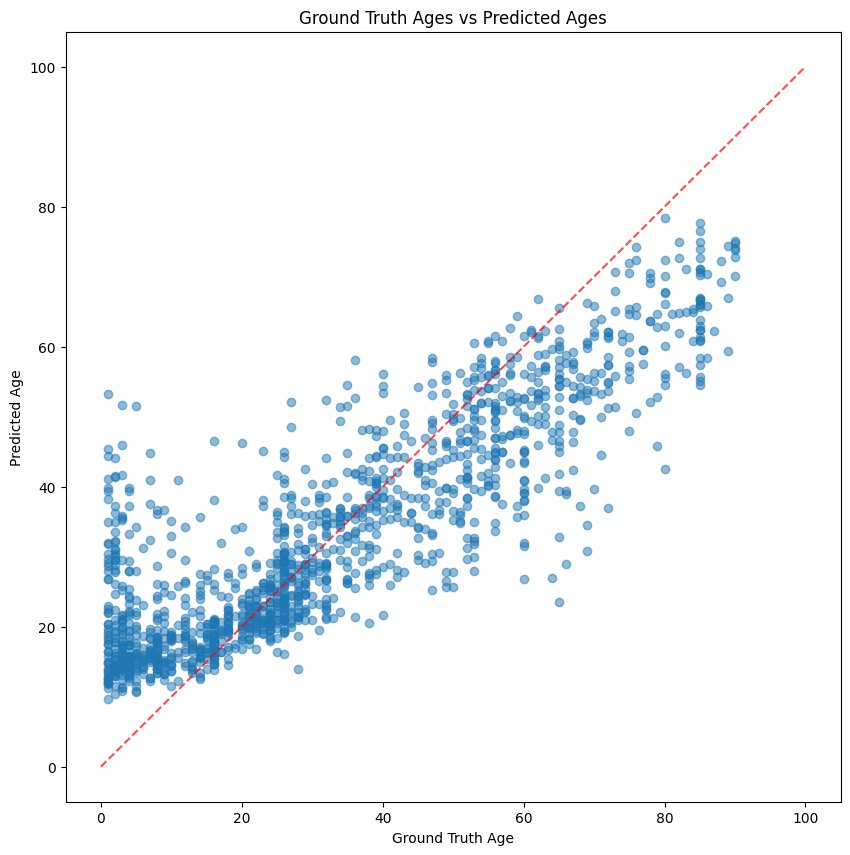

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(ground_truths, predictions, alpha=0.5)
plt.plot(range(0, 101), range(0, 101), '--r', alpha=0.7)  # draw a diagonal line

# Set the title and labels
plt.title('Ground Truth Ages vs Predicted Ages')
plt.xlabel('Ground Truth Age')
plt.ylabel('Predicted Age')

# Show the plot
plt.show()

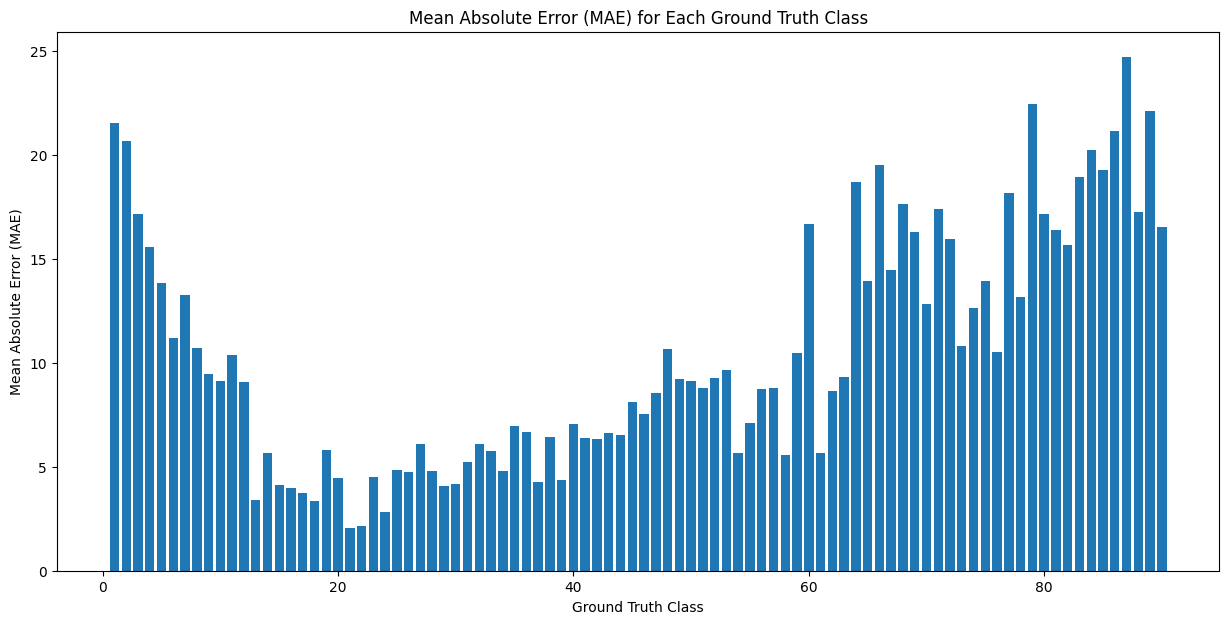

In [22]:
# Initialize a dictionary to hold the absolute errors for each class
errors = defaultdict(list)

# Loop over ground truth and predicted values
for gt, pred in zip(ground_truths, predictions):
    # Calculate the absolute error and append it to the list for this class
    errors[gt].append(abs(gt - pred))

# Calculate the mean absolute error for each class
mae_per_class = {k: np.mean(v) for k, v in errors.items()}

# Create lists of classes and MAEs
classes = list(mae_per_class.keys())
maes = list(mae_per_class.values())

# Create a bar plot
plt.figure(figsize=(15, 7))
plt.bar(classes, maes)

# Set the title and labels
plt.title('Mean Absolute Error (MAE) for Each Ground Truth Class')
plt.xlabel('Ground Truth Class')
plt.ylabel('Mean Absolute Error (MAE)')

# Show the plot
plt.show()

### We can see that the model underperforms for ages below 14 and above 60. This may be due to the fact that the training set does not have enough images for these ages.